## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

 ### 1) Linear Regression and Multiple Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()

In [5]:
X = df[["highway-mpg"]]

In [6]:
y = df['price']

In [7]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<b>Intercept (a)<b/>

In [9]:
lm.intercept_

38423.305858157386

<b>Slope</b>

In [10]:
lm.coef_

array([-821.73337832])

Final Model:
<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

<h3> Multiple Linear Regression</h3>

In [11]:
z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [12]:
lm.fit(z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h5>Intercept</h5>

In [13]:
lm.intercept_

-15806.624626329198

<h5>Slope</h5>

In [14]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

###  2) Model evaluation using Visualization

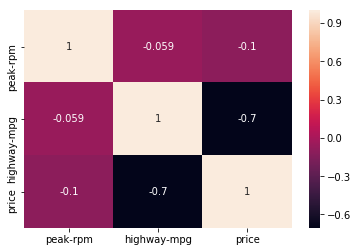

In [15]:
sns.heatmap(df[["peak-rpm","highway-mpg","price"]].corr(),annot=True)

#### Residual Plot


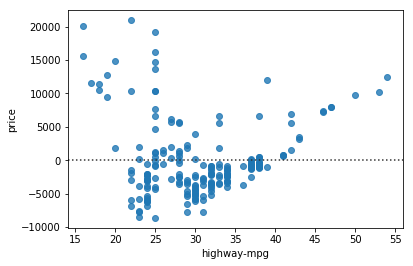

In [16]:

sns.residplot(df["highway-mpg"],df["price"])

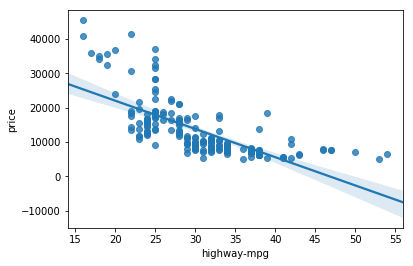

In [17]:
sns.regplot(df["highway-mpg"],df["price"])

### Multiple Lineal Regression

In [18]:
Yhat = lm.predict(z)


Text(0, 0.5, 'Proportion')

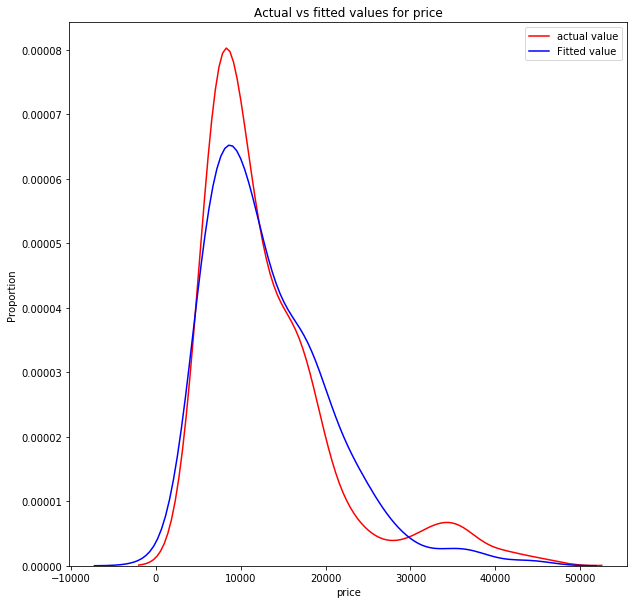

In [19]:
plt.figure(figsize=(10,10))
           
ax1 = sns.distplot(df['price'],color='r',hist=False,label='actual value')
sns.distplot(Yhat,color='b',hist=False,label='Fitted value')
plt.title("Actual vs fitted values for price")
plt.xlabel("price")
plt.ylabel("Proportion")


## 3) Polynomial Regression and Pipelines

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
Input=[('Scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [23]:
pipe = Pipeline(Input)

In [27]:
pipe.fit(z,y)

/home/laika/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/laika/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('Scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])